# Single Objective Optimization (Unconstrained Problem)


## Case Study 1: Opimization of Machinability Indices (CF,SR & CT) Of Hastealloy X Under Different Cooling Environments

### Reference: https://doi.org/10.3390/app11209725


Step-1: Importing all essential libraries

In [105]:
import numpy as np #importing numpy
import pandas as pd #importing pandas
from pymoo.algorithms.soo.nonconvex.de import DE #importing differential evolution
from pymoo.algorithms.soo.nonconvex.ga import GA #importing genetic algorithm
from pymoo.algorithms.soo.nonconvex.nelder import NelderMead #importing nedler mead
from pymoo.algorithms.soo.nonconvex.pso import PSO #importing PSO
from pymoo.optimize import minimize #importing objective
from pymoo.core.problem import ElementwiseProblem #importing elementwise problem
from pymoo.core.problem import Problem #importing problem
from pymoo.problems.functional import FunctionalProblem #importing functional problem
from pymoo.visualization.scatter import Scatter #importing scatter plot
import matplotlib.pyplot as plt #importing matplotlib plot

Step-2: Defining the optimization problem

In [108]:
class MyProblem(ElementwiseProblem): #variable, objective, constraint and bounds
    def __init__(self, vmin=33, vmax=124, fmin=0.05, fmax=0.15, emin=1, emax=3): 
        super().__init__(n_var=3,
                         n_obj=1,
                         n_ieq_constr=0,
                         xl=np.array([vmin, fmin, emin]),
                         xu=np.array([vmax, fmax, emax])) 

    def f1(self, v, f, e): #Objective Function 1 : Cutting Force
        return 212.7 - (0.244 * v) + (703 * f) + (20 * e) - (0.00571 * ((v) ** 2)) + (6289 * ((f) ** 2)) - (8.11 * ((e) ** 2)) - (0.60 * (v * f)) + (0.053 * (v * e)) - (143 * (f * e))
    def f2(self, v, f, e): #Objective Function 2 : Surface Roughness
        return 3.56 - (0.008 * v) - (9.65 * f) + (.73 * e) + (0.000015 * ((v) ** 2)) + (19.3 * ((f) ** 2)) - (0.265 * ((e) ** 2)) + (0.023 * (v * f)) + (0.00028 * (v * e)) - (0.65 * (f * e))
    def f3(self, v, f, e): #Objective Function 3 : Cutting Temperature
        return -0.083 + (0.076 * v) + (2521 * f) + (341.21 * e) + (0.0033 * ((v) ** 2)) - (1400 * ((f) ** 2)) - (118 * ((e) ** 2)) - (1.42 * (v * f)) - (0.16 * (v * e)) - (396.67 * (f * e))

    def _evaluate(self, x, out, *args, **kwargs): #evaluating output from the input vector
        v = x[0]
        f = x[1]
        e = x[2]

        f1 = self.f1(v, f, e) 
        out["F"] = [f1] 
        out["G"] = []

problem = MyProblem()

Step-3: Execution and Results of algorithms

In [109]:
pop_size=50
#algorithm = GA(pop_size)
#algorithm = DE(pop_size)
algorithm = PSO(pop_size)
#algorithm =NelderMead(init_simplex_scale=0.1)
res = minimize(problem, algorithm, ("n_gen", 100), verbose=False, seed=None,save_history=True)
print(' Optimal ObVal', 'Velocity', '  Feed ','   Env')
for i in range(0, len(res.F)):
    v = round(res.X[0],1)
    f= round(res.X[1],1)
    e= round(res.X[2],1)
    print('   ',  round(res.F[i],2), '    ', round(res.X[0],3), '   ', round(res.X[1],2), '  ', round(res.X[2],2))

iteration = (np.array([e.evaluator.n_eval for e in res.history]))/pop_size #generations
opt = np.array([e.opt[0].F for e in res.history]) #optimal values throughout the generations
df2 = pd.DataFrame(opt, columns=['Optimal Value'])
df1 = pd.DataFrame({'Iteration': iteration})
df = pd.concat([df1, df2], axis=1)
print(df)

 Optimal ObVal Velocity   Feed     Env
    127.08      124.0     0.05    3.0
    Iteration  Optimal Value
0         1.0     155.208373
1         2.0     154.240929
2         3.0     143.824128
3         4.0     139.871079
4         5.0     135.374079
..        ...            ...
95       96.0     127.075540
96       97.0     127.075540
97       98.0     127.075540
98       99.0     127.075540
99      100.0     127.075540

[100 rows x 2 columns]


Step-4: Convergence Plots

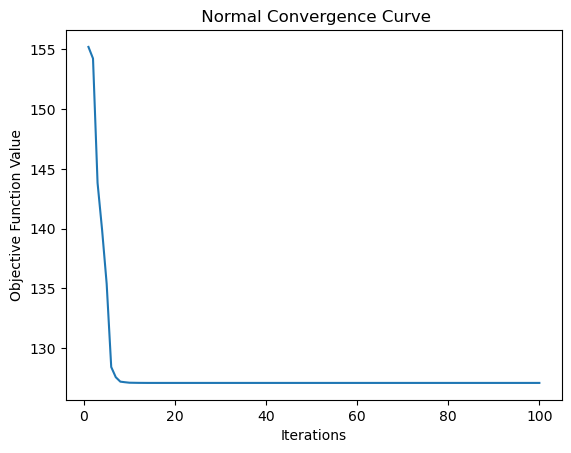

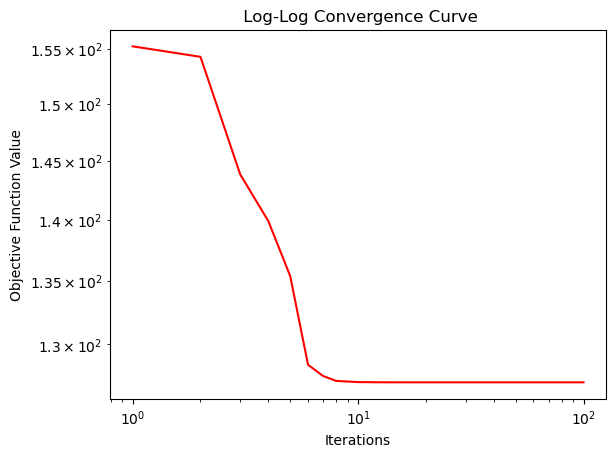

In [110]:
#Normal Convergence
plt.title(" Normal Convergence Curve")
plt.plot(iteration, opt, "-")
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.show()

#Log-Log Plot
plt.title(" Log-Log Convergence Curve")
plt.plot(iteration, opt, "-", c='red')
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.show()
